In [1]:
"""
Example of using a Random Forest classifier
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Display contour plot of f at all points (x[i],y[j])
def contour_plot1(x,y,f,n_levels):
    xx, yy = np.meshgrid(x, y)
    p=np.hstack([xx.reshape(-1,1),yy.reshape(-1,1)])
    fp=f(p)
    plt.contourf(x,y,fp.reshape(xx.shape),n_levels)

# Display contour plot of f(x,y)[c] at all points (x[i],y[j])
# Assumes f returns vector for each point. Chooses element c
def contour_plot2(x,y,f,c,n_levels):
    xx, yy = np.meshgrid(x, y)
    p=np.hstack([xx.reshape(-1,1),yy.reshape(-1,1)])
    fp=f(p)[:,c]
    plt.contourf(x,y,fp.reshape(xx.shape),n_levels)

D:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


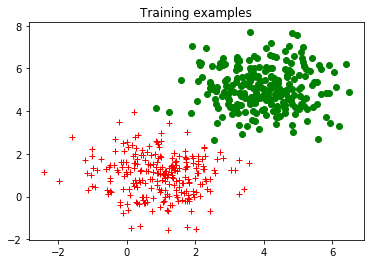

Number of positives in training set 250  of  500
Number of true positives 248
Number of false negatives 2


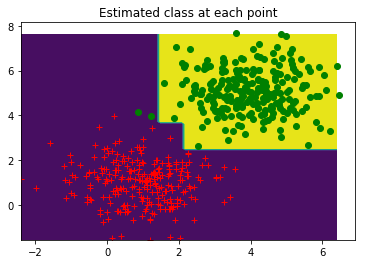

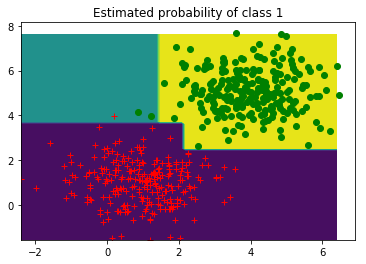

In [2]:

X, y = make_blobs(n_samples=500, centers = [(1, 1), (4, 5)], n_features=2)

y0 = y
# Use different colours for different classes
X0=X[y==0] # Select samples for class 0
X1=X[y==1] # Select samples for class 1
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
plt.title("Training examples")
plt.show()


clf = RandomForestClassifier(n_estimators=1, max_depth=3,
                             min_samples_leaf=2, criterion="entropy",
                             max_features=1, random_state=0)
clf.fit(X, y)

#Test performance on training data
y_pred=clf.predict(X)

N=y.size
N_pos=np.count_nonzero(y)
print("Number of positives in training set",N_pos," of ",N)
print("Number of true positives",(y[y_pred==1]).sum())
print("Number of false negatives",(y[y_pred==0]).sum())

# ==== Plot contours of the result ====

# Create a grid of points
x = np.arange(X[:,0].min(), X[:,0].max(), 0.1)
y = np.arange(X[:,1].min(), X[:,1].max(), 0.1)

# Plot class results
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot1(x,y,clf.predict,15)
plt.title("Estimated class at each point")
plt.show()

# Plot class 1 probability
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot2(x,y,clf.predict_proba,1,15)
plt.title("Estimated probability of class 1")
plt.show()

1) Change the max_depth 
Number of positives in training set 250  of  500
Number of true positives 248
Number of false negatives 2


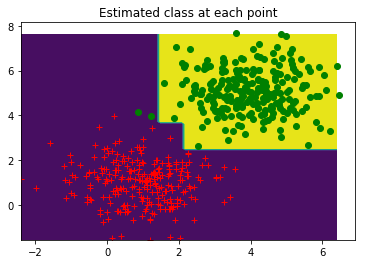

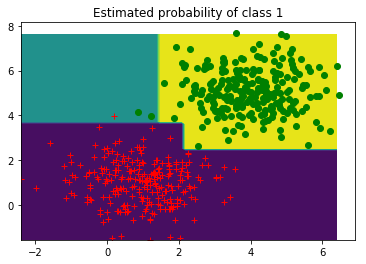

In [3]:
# 1) Change the max_depth 
# 3 --> 5
print('1) Change the max_depth ')
clf = RandomForestClassifier(n_estimators=1, max_depth=5,
                             min_samples_leaf=2, criterion="entropy",
                             max_features=1, random_state=0)
y = y0
clf.fit(X, y)

#Test performance on training data
y_pred=clf.predict(X)

N=y.size
N_pos=np.count_nonzero(y)
print("Number of positives in training set",N_pos," of ",N)
print("Number of true positives",(y[y_pred==1]).sum())
print("Number of false negatives",(y[y_pred==0]).sum())

# ==== Plot contours of the result ====

# Create a grid of points
x = np.arange(X[:,0].min(), X[:,0].max(), 0.1)
y = np.arange(X[:,1].min(), X[:,1].max(), 0.1)

# Plot class results
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot1(x,y,clf.predict,15)
plt.title("Estimated class at each point")
plt.show()

# Plot class 1 probability
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot2(x,y,clf.predict_proba,1,15)
plt.title("Estimated probability of class 1")
plt.show()

2) Change the number of trees (n_estimators) 1 to 4, max_depth 3 
Number of positives in training set 250  of  500
Number of true positives 249
Number of false negatives 1


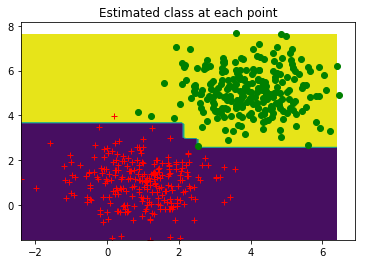

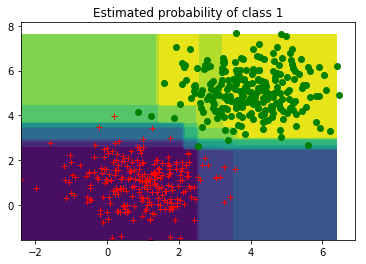

In [4]:
# 2) Change the number of trees (n_estimators)
# 1 --> 4
print('2) Change the number of trees (n_estimators) 1 to 4, max_depth 3 ')
clf = RandomForestClassifier(n_estimators=4, max_depth=3,
                             min_samples_leaf=2, criterion="entropy",
                             max_features=1, random_state=0)
y = y0
clf.fit(X, y)

#Test performance on training data
y_pred=clf.predict(X)

N=y.size
N_pos=np.count_nonzero(y)
print("Number of positives in training set",N_pos," of ",N)
print("Number of true positives",(y[y_pred==1]).sum())
print("Number of false negatives",(y[y_pred==0]).sum())

# ==== Plot contours of the result ====

# Create a grid of points
x = np.arange(X[:,0].min(), X[:,0].max(), 0.1)
y = np.arange(X[:,1].min(), X[:,1].max(), 0.1)

# Plot class results
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot1(x,y,clf.predict,15)
plt.title("Estimated class at each point")
plt.show()

# Plot class 1 probability
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot2(x,y,clf.predict_proba,1,15)
plt.title("Estimated probability of class 1")
plt.show()

2) Change the number of trees (n_estimators) 1 to 4, max_depth 5 
Number of positives in training set 250  of  500
Number of true positives 248
Number of false negatives 2


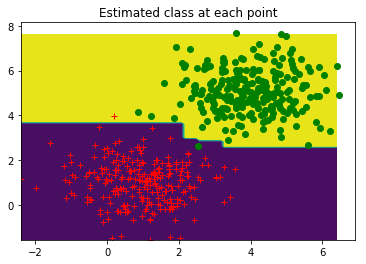

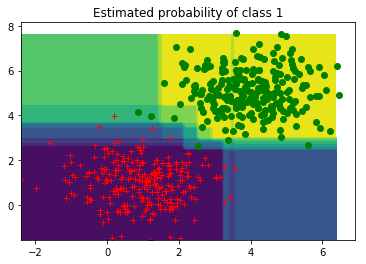

In [5]:
print('2) Change the number of trees (n_estimators) 1 to 4, max_depth 5 ')
clf = RandomForestClassifier(n_estimators=4, max_depth=5,
                             min_samples_leaf=2, criterion="entropy",
                             max_features=1, random_state=0)
y = y0
clf.fit(X, y)

#Test performance on training data
y_pred=clf.predict(X)

N=y.size
N_pos=np.count_nonzero(y)
print("Number of positives in training set",N_pos," of ",N)
print("Number of true positives",(y[y_pred==1]).sum())
print("Number of false negatives",(y[y_pred==0]).sum())

# ==== Plot contours of the result ====

# Create a grid of points
x = np.arange(X[:,0].min(), X[:,0].max(), 0.1)
y = np.arange(X[:,1].min(), X[:,1].max(), 0.1)

# Plot class results
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot1(x,y,clf.predict,15)
plt.title("Estimated class at each point")
plt.show()

# Plot class 1 probability
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot2(x,y,clf.predict_proba,1,15)
plt.title("Estimated probability of class 1")
plt.show()

3) Move the centres apart together 


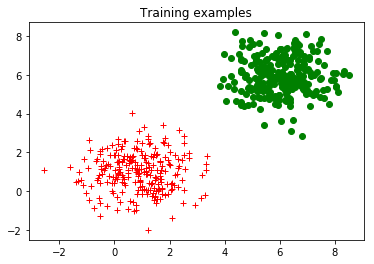

Number of positives in training set 250  of  500
Number of true positives 250
Number of false negatives 0


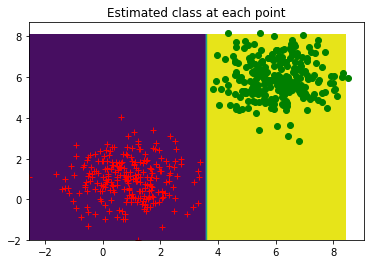

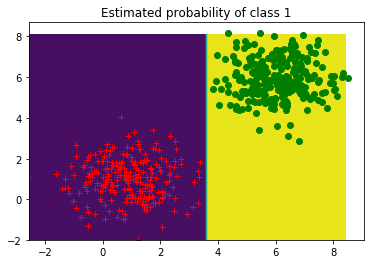

3) Move the centres closer together 


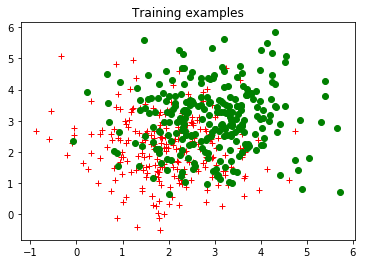

Number of positives in training set 250  of  500
Number of true positives 165
Number of false negatives 85


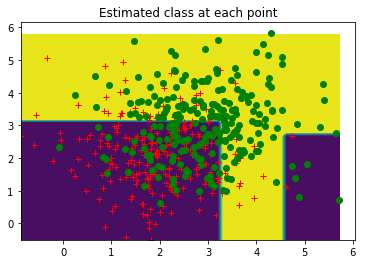

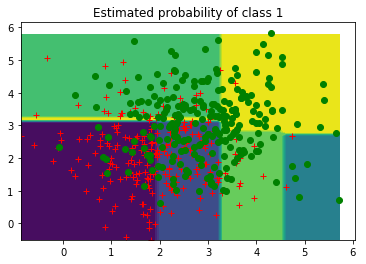

In [6]:
# 3) Move the centres apart/closer together
print('3) Move the centres apart together ')
X, y = make_blobs(n_samples=500, centers = [(1, 1), (6, 6)], n_features=2)

X0=X[y==0] # Select samples for class 0
X1=X[y==1] # Select samples for class 1
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
plt.title("Training examples")
plt.show()


clf = RandomForestClassifier(n_estimators=1, max_depth=3,
                             min_samples_leaf=2, criterion="entropy",
                             max_features=1, random_state=0)
clf.fit(X, y)

#Test performance on training data
y_pred=clf.predict(X)

N=y.size
N_pos=np.count_nonzero(y)
print("Number of positives in training set",N_pos," of ",N)
print("Number of true positives",(y[y_pred==1]).sum())
print("Number of false negatives",(y[y_pred==0]).sum())

# ==== Plot contours of the result ====

# Create a grid of points
x = np.arange(X[:,0].min(), X[:,0].max(), 0.1)
y = np.arange(X[:,1].min(), X[:,1].max(), 0.1)

# Plot class results
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot1(x,y,clf.predict,15)
plt.title("Estimated class at each point")
plt.show()

# Plot class 1 probability
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot2(x,y,clf.predict_proba,1,15)
plt.title("Estimated probability of class 1")
plt.show()


print('3) Move the centres closer together ')
X, y = make_blobs(n_samples=500, centers = [(2, 2), (3, 3)], n_features=2)

X0=X[y==0] # Select samples for class 0
X1=X[y==1] # Select samples for class 1
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
plt.title("Training examples")
plt.show()


clf = RandomForestClassifier(n_estimators=1, max_depth=3,
                             min_samples_leaf=2, criterion="entropy",
                             max_features=1, random_state=0)
clf.fit(X, y)

#Test performance on training data
y_pred=clf.predict(X)

N=y.size
N_pos=np.count_nonzero(y)
print("Number of positives in training set",N_pos," of ",N)
print("Number of true positives",(y[y_pred==1]).sum())
print("Number of false negatives",(y[y_pred==0]).sum())

# ==== Plot contours of the result ====

# Create a grid of points
x = np.arange(X[:,0].min(), X[:,0].max(), 0.1)
y = np.arange(X[:,1].min(), X[:,1].max(), 0.1)

# Plot class results
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot1(x,y,clf.predict,15)
plt.title("Estimated class at each point")
plt.show()

# Plot class 1 probability
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot2(x,y,clf.predict_proba,1,15)
plt.title("Estimated probability of class 1")
plt.show()

4) Increase the number of samples


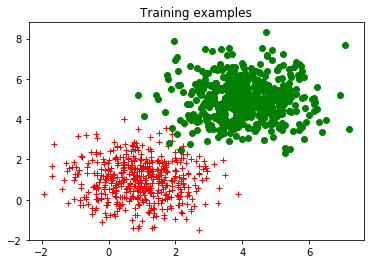

Number of positives in training set 500  of  1000
Number of true positives 494
Number of false negatives 6


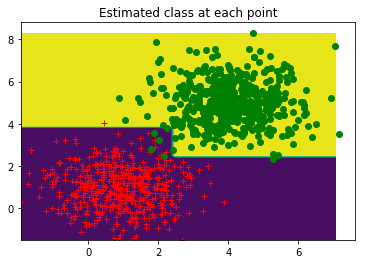

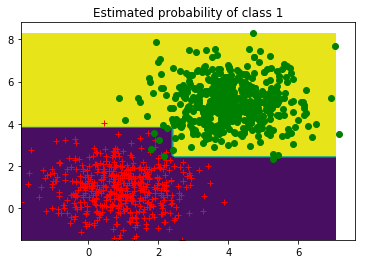

In [7]:
# 4) Increase the number of samples
# 100 --> 1000
print('4) Increase the number of samples')
X, y = make_blobs(n_samples=1000, centers = [(1, 1), (4, 5)], n_features=2)

# Use different colours for different classes
X0=X[y==0] # Select samples for class 0
X1=X[y==1] # Select samples for class 1
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
plt.title("Training examples")
plt.show()

clf = RandomForestClassifier(n_estimators=1, max_depth=3,
                             min_samples_leaf=2, criterion="entropy",
                             max_features=1, random_state=0)
clf.fit(X, y)

#Test performance on training data
y_pred=clf.predict(X)

N=y.size
N_pos=np.count_nonzero(y)
print("Number of positives in training set",N_pos," of ",N)
print("Number of true positives",(y[y_pred==1]).sum())
print("Number of false negatives",(y[y_pred==0]).sum())

# ==== Plot contours of the result ====

# Create a grid of points
x = np.arange(X[:,0].min(), X[:,0].max(), 0.1)
y = np.arange(X[:,1].min(), X[:,1].max(), 0.1)

# Plot class results
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot1(x,y,clf.predict,15)
plt.title("Estimated class at each point")
plt.show()

# Plot class 1 probability
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot2(x,y,clf.predict_proba,1,15)
plt.title("Estimated probability of class 1")
plt.show()